# Modeling and Training MNIST Dataset Using TensorFlow GPU

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/the-deep-learners/deep-learning-illustrated/blob/master/notebooks/vggnet_in_keras.ipynb)

#### Load dependencies

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import BatchNormalization
import numpy as np
import datetime

In [2]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

#### Load *and preprocess* data

In [3]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data(path="mnist.npz")
print (X_train.shape)
print (Y_train.shape)
print (X_test.shape)
print (Y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [4]:
X_train = X_train.reshape (60000, 28, 28, 1).astype('float32')
X_test = X_test.reshape (10000, 28, 28, 1).astype('float32')
X_train /= 255
X_test /= 255

In [5]:
n_classes = 10
Y_train = tf.keras.utils.to_categorical(Y_train, n_classes)
Y_test = tf.keras.utils.to_categorical(Y_test, n_classes)

#### Design neural network architecture

In [6]:
model = Sequential()

model.add(Conv2D(64, kernel_size=(3, 3), strides=(1, 1), padding="same", activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(64, kernel_size=(3, 3), strides=(1, 1), padding="same", activation='relu'))
model.add(BatchNormalization())

model.add(Conv2D(128, kernel_size=(3, 3), strides=(1, 1), padding="same", activation='relu'))
model.add(Conv2D(128, kernel_size=(3, 3), strides=(1, 1), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())


model.add(Conv2D(256, kernel_size=(3, 3), strides=(1, 1), padding="same",  activation='relu'))
model.add(Conv2D(256, kernel_size=(3, 3), strides=(1, 1), padding="same",  activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())


model.add(Conv2D(512, kernel_size=(3, 3), strides=(1, 1), padding="same",  activation='relu'))
model.add(Conv2D(512, kernel_size=(3, 3), strides=(1, 1), padding="same",  activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())


model.add(Flatten())

model.add(Dense(2048, activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(2048, activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(n_classes, activation='softmax'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 64)        256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 128)       147584    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 128)       0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 14, 14, 128)       5

#### Configure model

In [8]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#### Configure TensorBoard 

In [9]:
%load_ext tensorboard
!rm -rf ./logs/

In [10]:
log_dir = "logs/deepCNN/" + f'{datetime.datetime.now().strftime("%Y%m%d")}_HL'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [11]:
%tensorboard --logdir logs/deepCNN

Reusing TensorBoard on port 6006 (pid 3216), started 0:00:46 ago. (Use '!kill 3216' to kill it.)

#### Train!

In [12]:
model.fit(X_train, Y_train, batch_size=256, epochs=5, verbose=1,
          validation_data=(X_test, Y_test), shuffle=True, callbacks=[tensorboard_callback])

Epoch 1/5
235/235 [==============================] - 23s 97ms/step - loss: 0.2341 - accuracy: 0.9451 - val_loss: 13.7202 - val_accuracy: 0.1135
Epoch 2/5
235/235 [==============================] - 21s 89ms/step - loss: 0.0471 - accuracy: 0.9860 - val_loss: 3.7558 - val_accuracy: 0.4389
Epoch 3/5
235/235 [==============================] - 21s 87ms/step - loss: 0.0374 - accuracy: 0.9890 - val_loss: 0.0359 - val_accuracy: 0.9887
Epoch 4/5
235/235 [==============================] - 21s 90ms/step - loss: 0.0316 - accuracy: 0.9907 - val_loss: 0.0330 - val_accuracy: 0.9891
Epoch 5/5
235/235 [==============================] - 21s 89ms/step - loss: 0.0256 - accuracy: 0.9922 - val_loss: 0.0317 - val_accuracy: 0.9923


In [13]:
model.save("./Trained_Model/final_model.h5")

## Load model


In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import BatchNormalization
import numpy as np
from time import time

In [15]:
import tensorflow as tf
from IPython.display import Image, SVG
# import matplotlib.pyplot as plt
import numpy as np
import os 
from os import listdir
from os.path import isfile, join

In [16]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing import image as image_processing
from IPython.display import Image as img_show
import numpy as np
from time import time

In [17]:
# load the trained model
model = load_model("./Trained_Model/final_model.h5")

# recompile the model
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [18]:
# define some colors for print-function
red = '\033[31m'
bolt = '\033[1m'
blu = '\033[34m'
prp = '\033[35m'
nc = '\033[0m'

In [19]:
def img_predict (img_path):
   
    img_name = img_path.split("/")[-1]
    print(f'{blu}Processing Image :: {prp}{img_name}{nc}')
    
    
    # use keras built in img processing to read input image
    image_size = (28, 28)
    img = tf.keras.preprocessing.image.load_img(img_path,
                                    target_size=image_size,
                                    color_mode="grayscale")
    
    # convert raw img to np arrays
    image = img_to_array(img)
    
    # con2v takes an array of 4 parameters, need to expand to add
    # additional dimension to the image
    image /= 255
    imported_img = img_show(img_path, img_path, width=20, height=20, embed=True)
    display(imported_img)
    
    image = np.expand_dims(image, axis=0)
    
    # Invert the pixel values to match the original data
    # when Keras load the picture, the rgb values were inverted
    image = 1 - image
    
    prediction = np.argmax(model.predict(image), axis=-1)
    return print(f"This is number :: {red}{bolt}{prediction[0]}{nc}\n{('=')*40}")

Processing Image :: 0.JPG


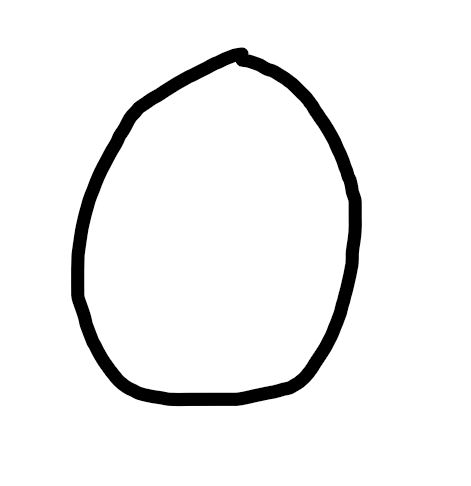

This is number :: 0
Processing Image :: 1.jpg


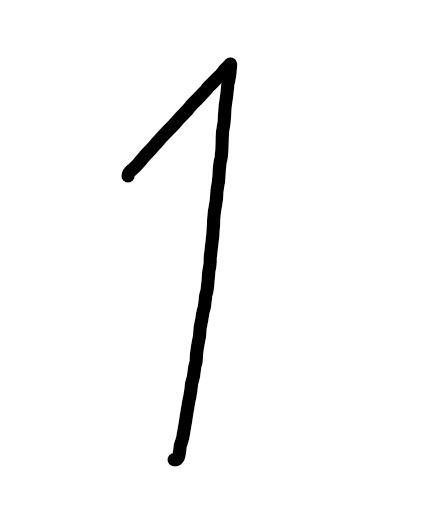

This is number :: 1
Processing Image :: 2.jpg


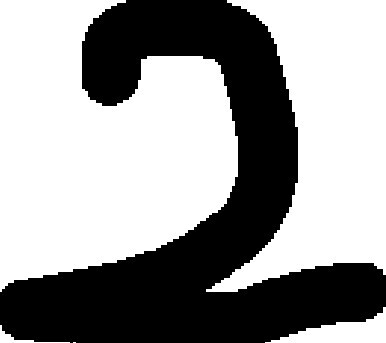

This is number :: 2
Processing Image :: 3.jpg


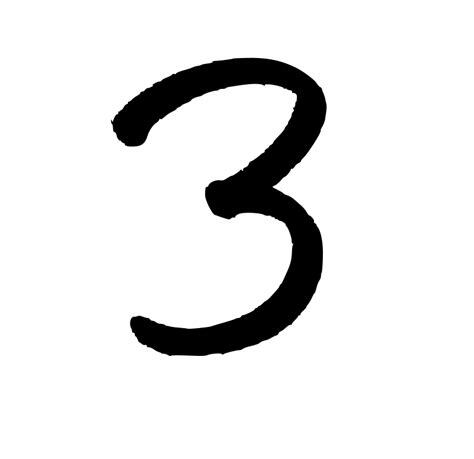

This is number :: 3
Processing Image :: 3black.JPG


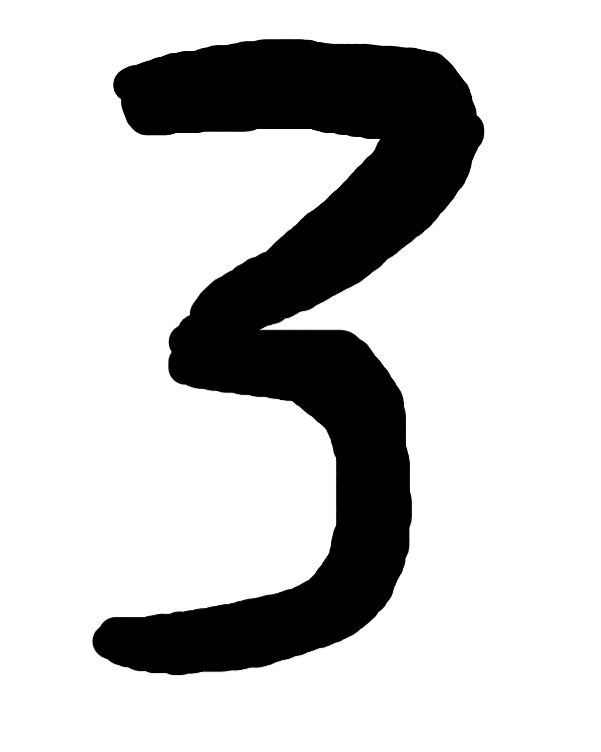

This is number :: 3
Processing Image :: 3ct.JPG


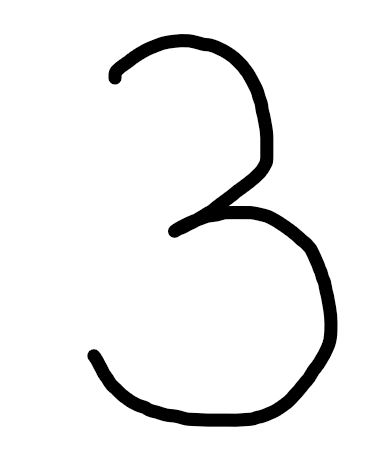

This is number :: 3
Processing Image :: 3light-blue.JPG


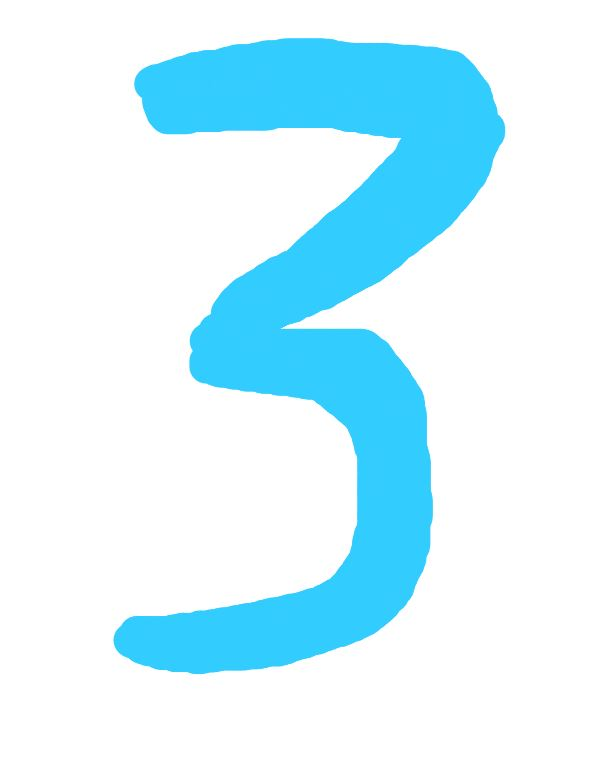

This is number :: 3
Processing Image :: 3pink.JPG


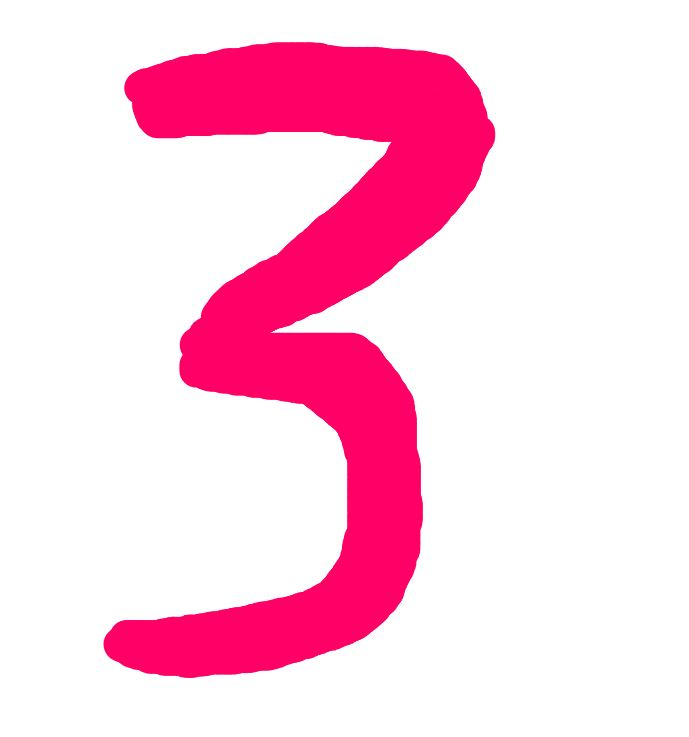

This is number :: 3
Processing Image :: 3purple.JPG


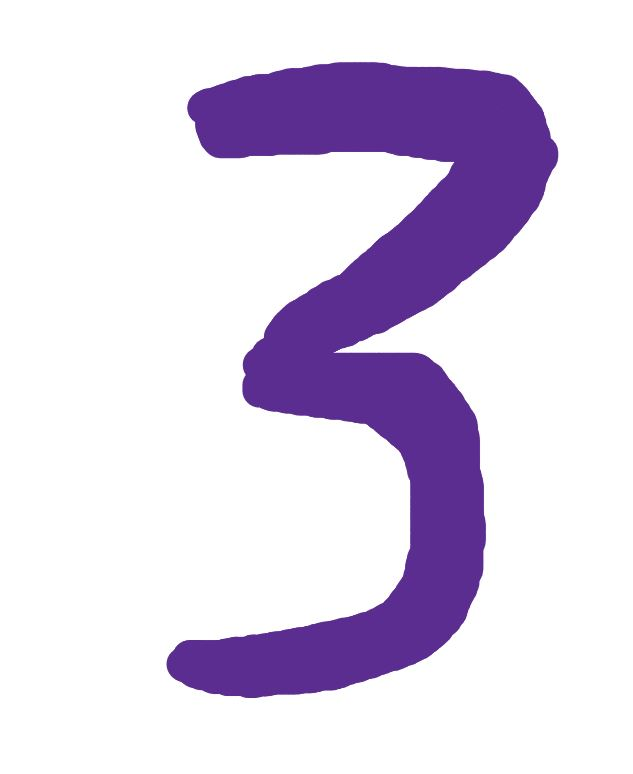

This is number :: 3
Processing Image :: 3sk.JPG


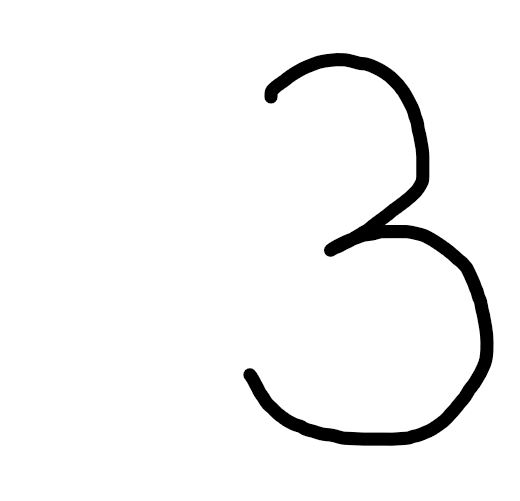

This is number :: 3
Processing Image :: 5ct.JPG


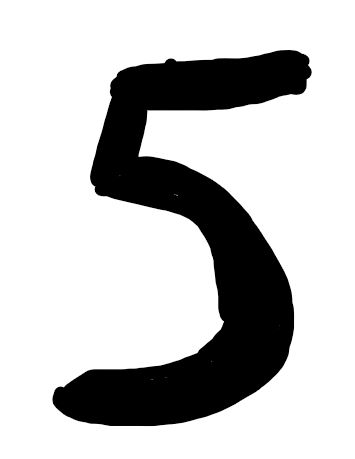

This is number :: 5
Processing Image :: 5sk.JPG


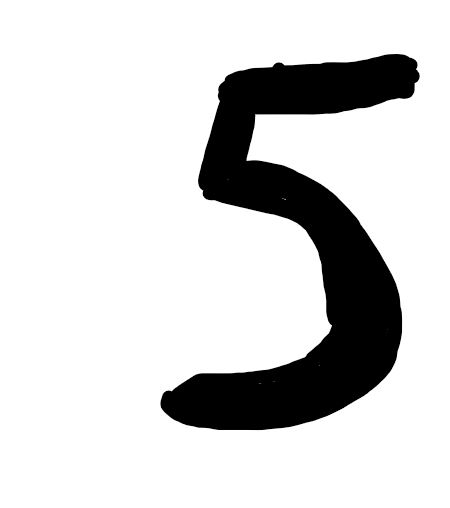

This is number :: 5
Processing Image :: 6.JPG


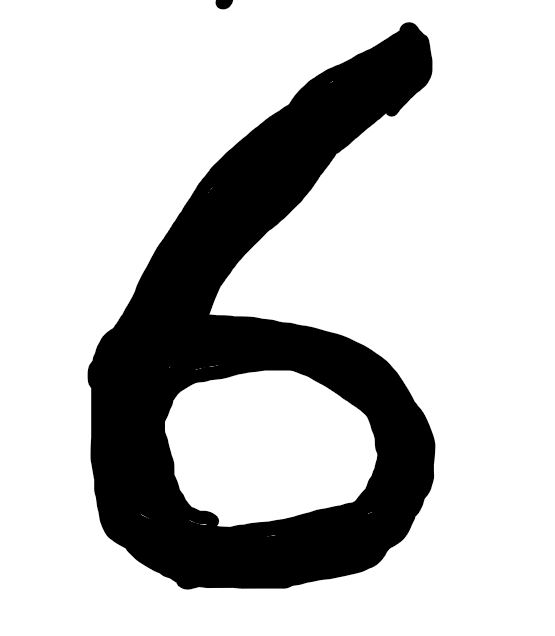

This is number :: 6
Processing Image :: 7-off-ct.JPG


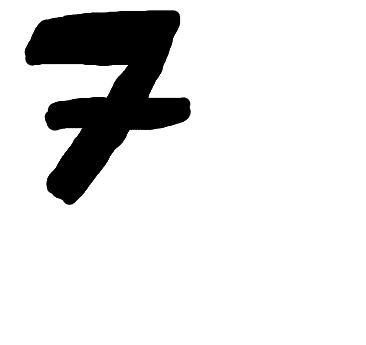

This is number :: 7
Processing Image :: 7.JPG


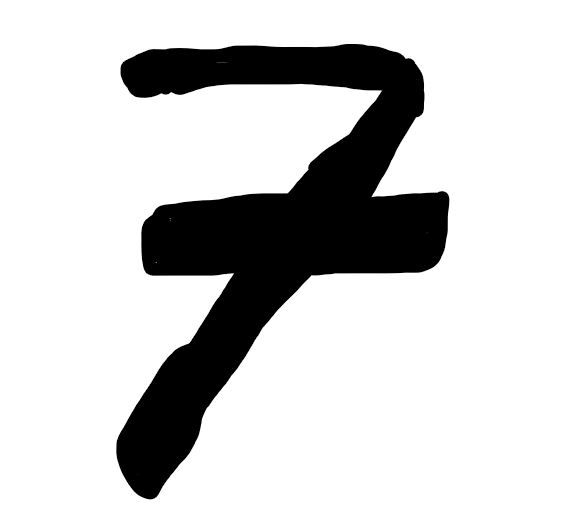

This is number :: 7
Processing Image :: 7way-off-ct.JPG


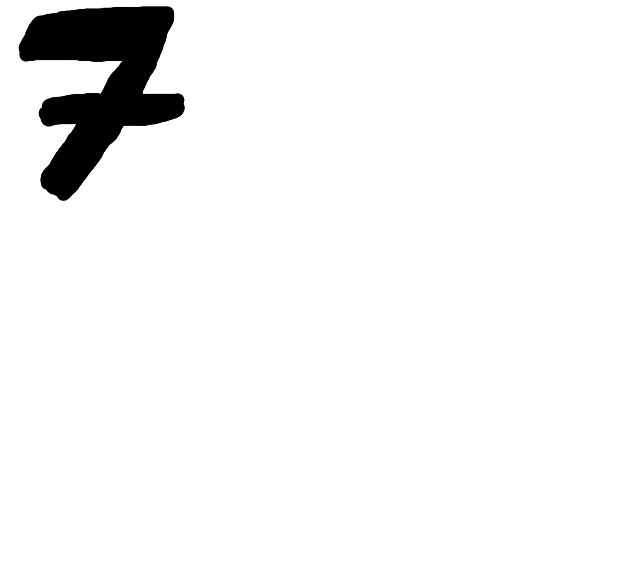

This is number :: 1
Processing Image :: 8-thicker.jpg


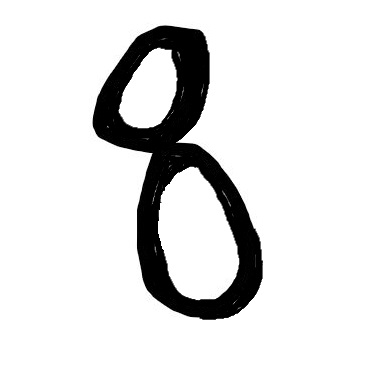

This is number :: 8
Processing Image :: 8.jpg


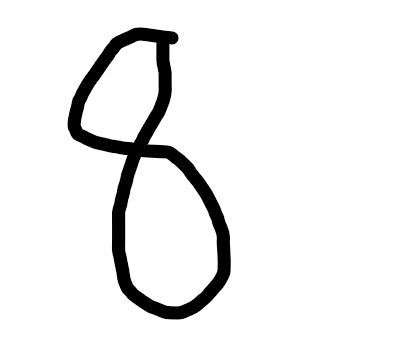

This is number :: 8
Processing Image :: 9-ct-square-thin.JPG


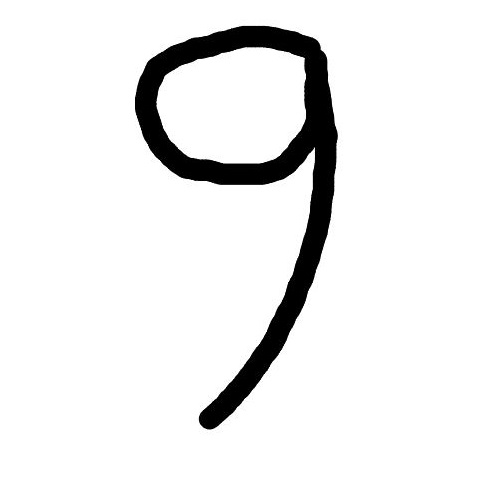

This is number :: 9
Processing Image :: 9-ct-thick-square-off-ct.jpg


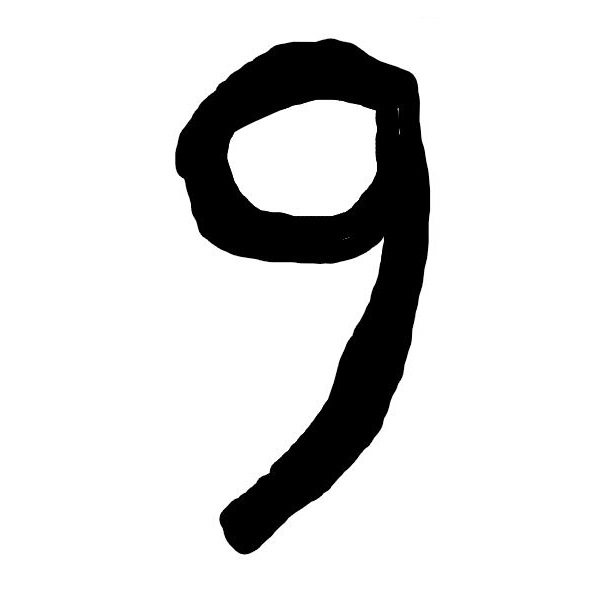

This is number :: 9
Processing Image :: 9-ct-thick-square.JPG


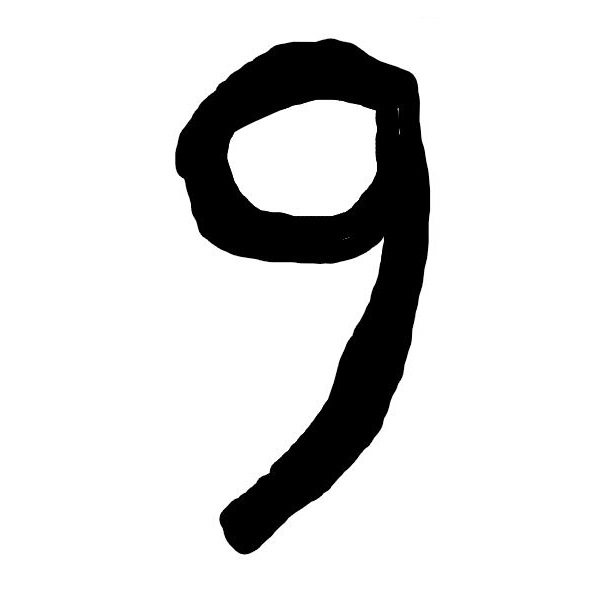

This is number :: 9
Processing Image :: 9-square-thin-off-ct.jpg


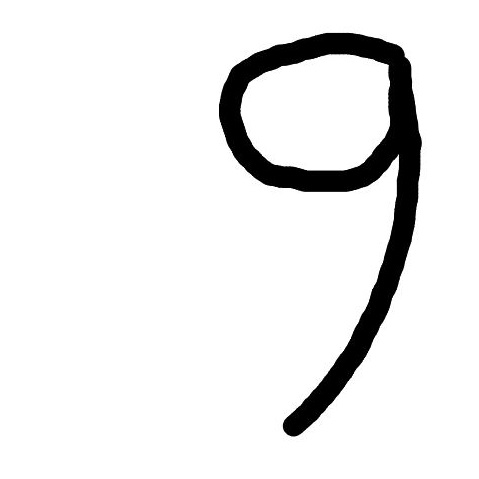

This is number :: 7
Processing Image :: 9-thick-sq-ct-straight-leg.JPG


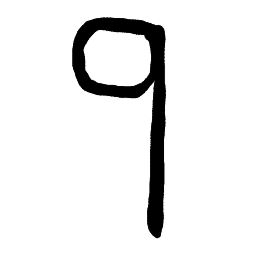

This is number :: 7
Processing Image :: 9-thick-straght-leg-square.JPG


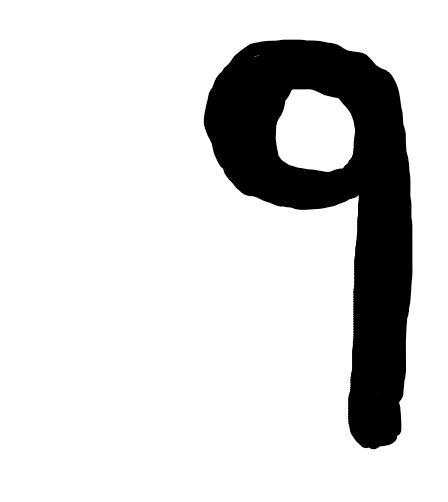

This is number :: 7
Processing Image :: 9-thin-sq-ct-straight-leg.JPG


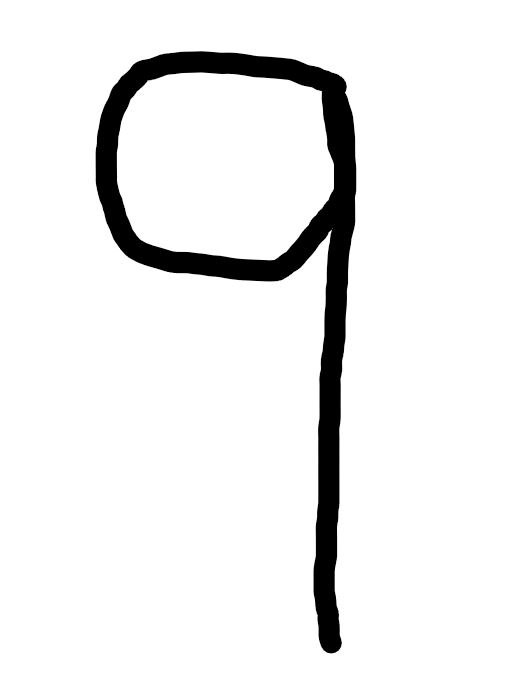

This is number :: 9
Processing Image :: 9-try-to-be-round-belly.JPG


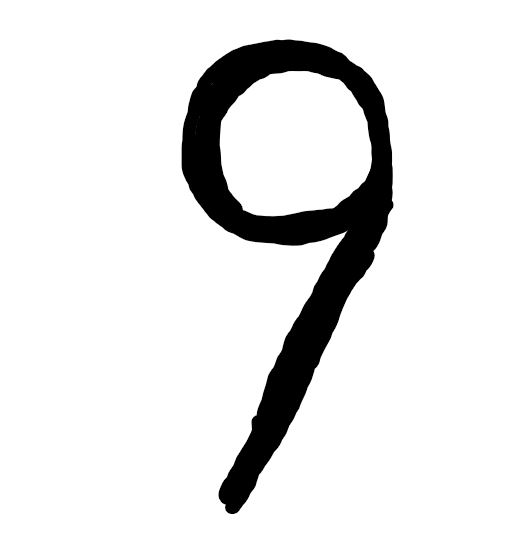

This is number :: 9
Processing Image :: 9.jpeg


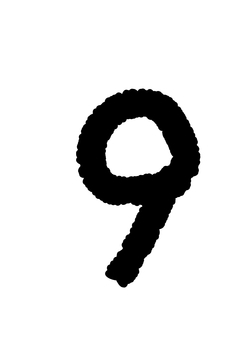

This is number :: 9
Processing Image :: 9.jpg


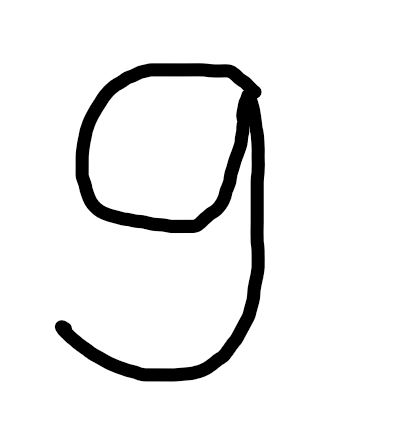

This is number :: 9
Processing Image :: canvas3.png


This is number :: 3
Processing Image :: hand-4-ct-cmplx.JPG


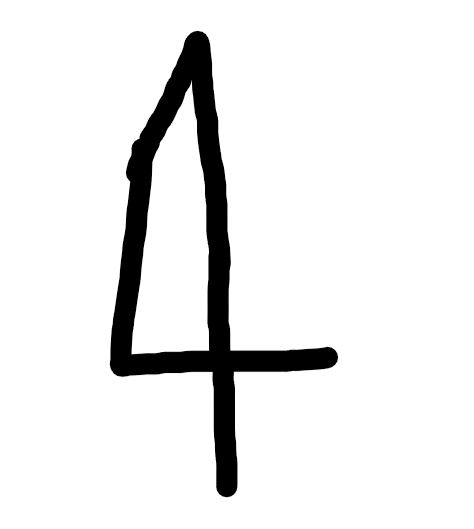

This is number :: 4
Processing Image :: hand-4-ct-nice-thin.JPG


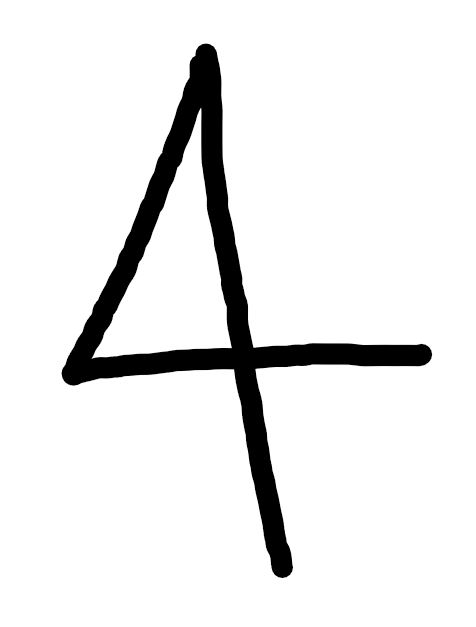

This is number :: 4
Processing Image :: hand-4-ct.JPG


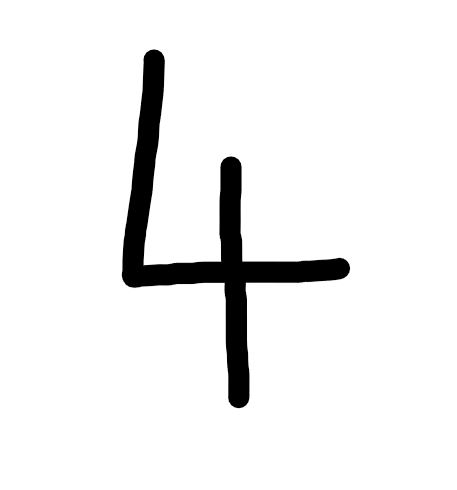

This is number :: 4
Processing Image :: hand7-.JPG


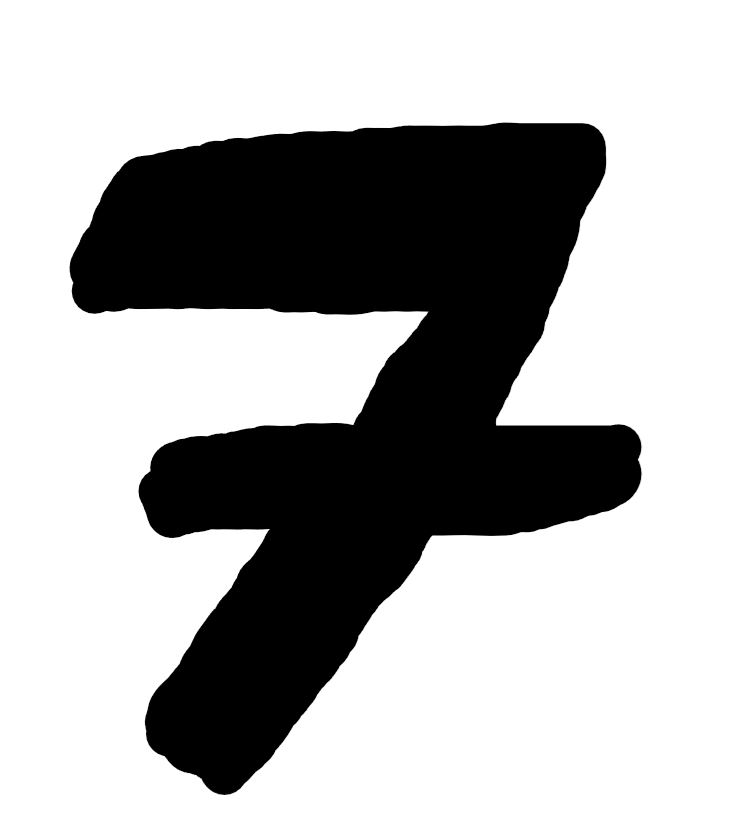

This is number :: 7
Processing Image :: hand7.JPG


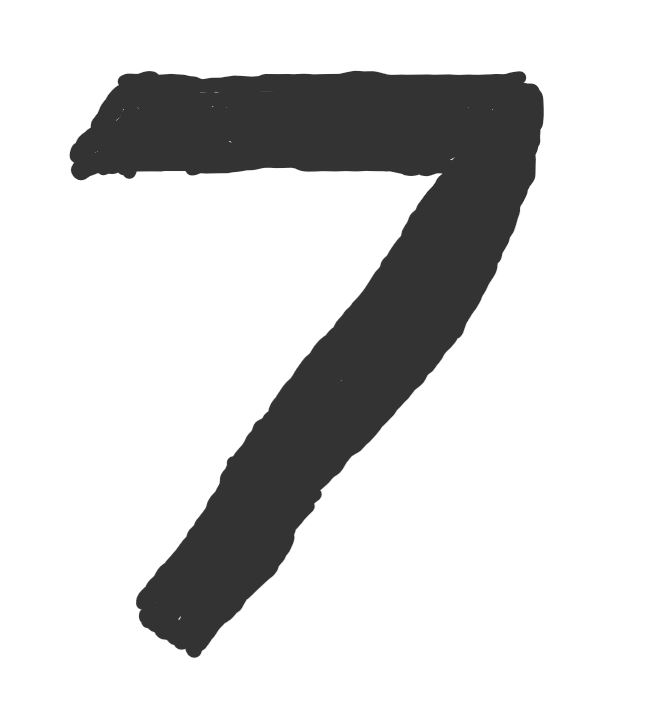

This is number :: 7
Processing Image :: hand8-distorted.jpg


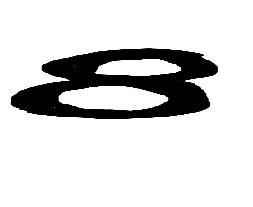

This is number :: 9
Processing Image :: hand8-not-sq.JPG


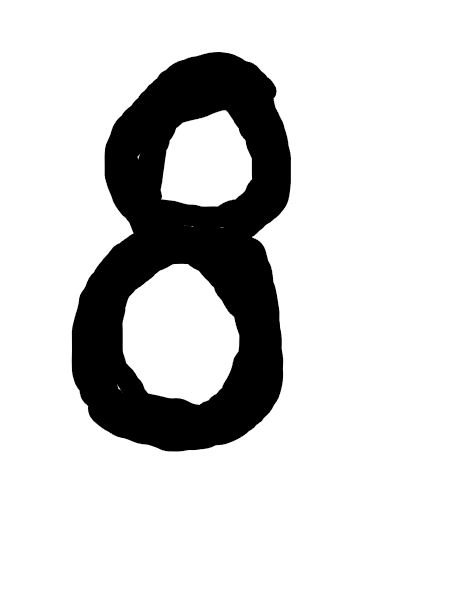

This is number :: 9
Processing Image :: hand8-square-more-round.jpg


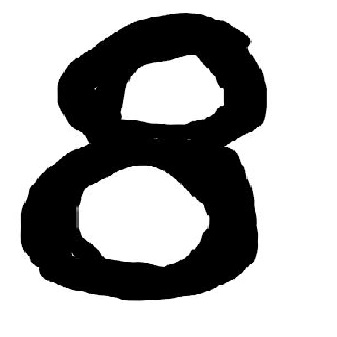

This is number :: 8
Processing Image :: hand8-square.JPG


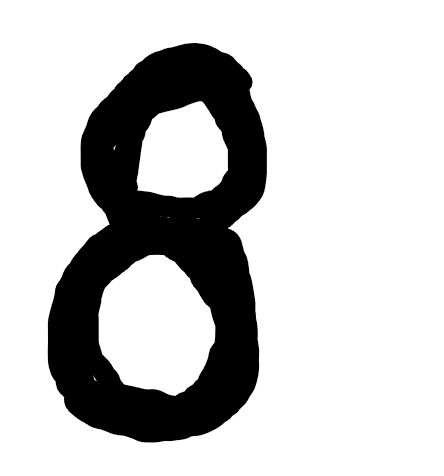

This is number :: 8
Processing Image :: hand9-long-leg-ct.jpg


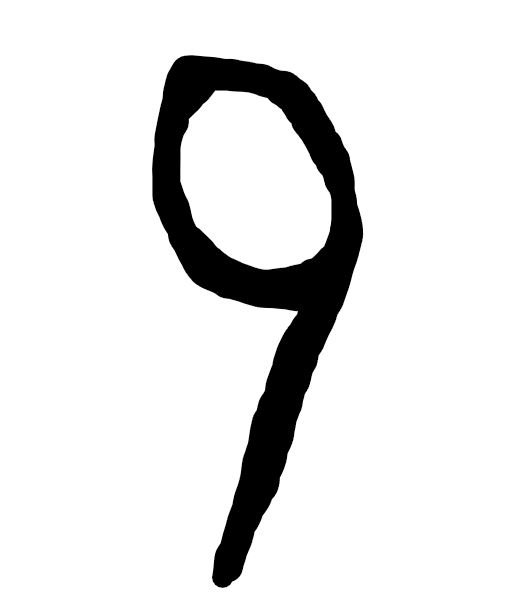

This is number :: 9
Processing Image :: hand9-short-leg-ct.jpg


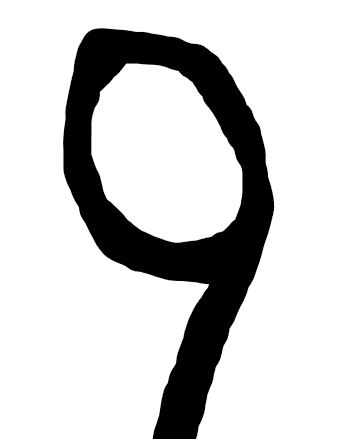

This is number :: 9
Processing Image :: hand9-thin-ct.jpg


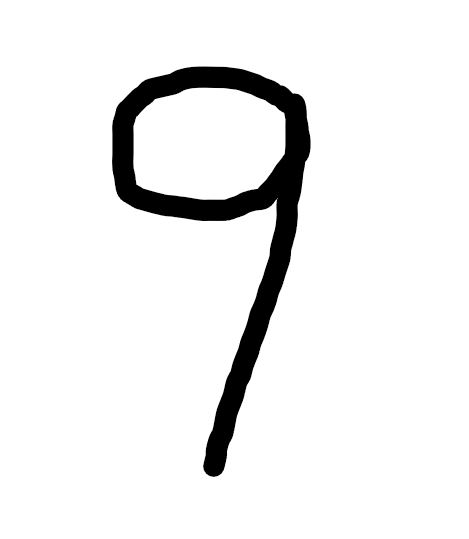

This is number :: 9
Processing Image :: test0.png


This is number :: 0
Processing Image :: test2.png


This is number :: 2
Processing Image :: test5.png


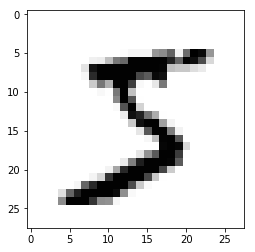

This is number :: 3
Processing Image :: test8.png


This is number :: 8
Processing Image :: text-4-off-ct-with-artifacts.JPG


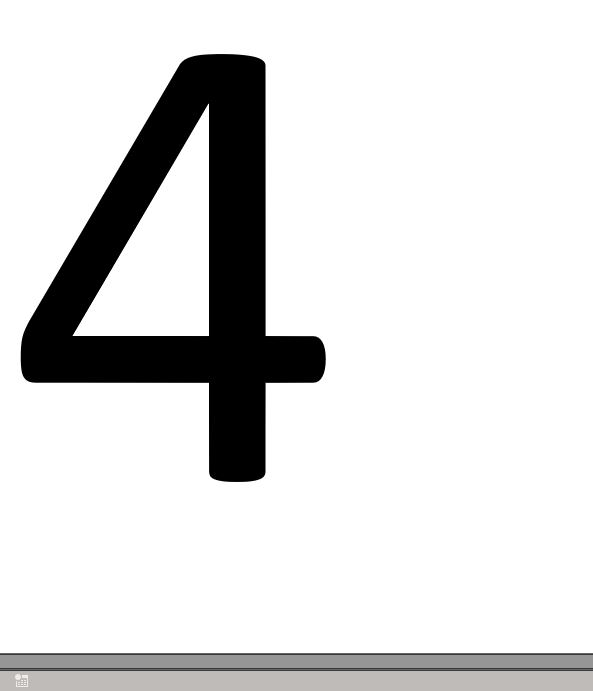

This is number :: 4
Processing Image :: text0.JPG


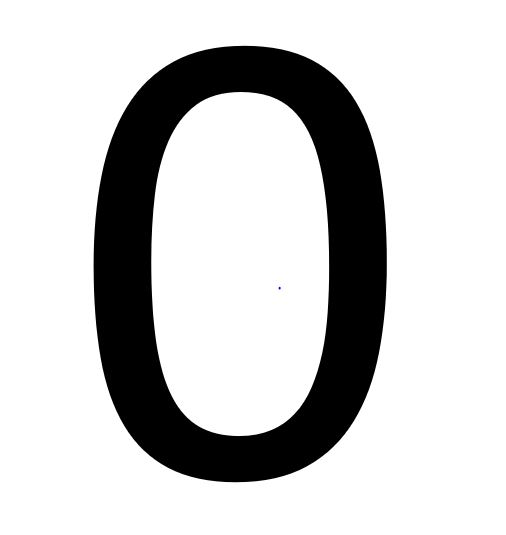

This is number :: 0
Processing Image :: text1.JPG


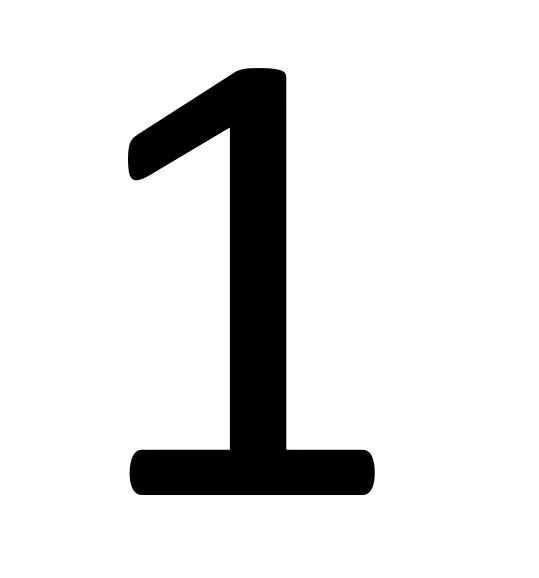

This is number :: 1
Processing Image :: text2.JPG


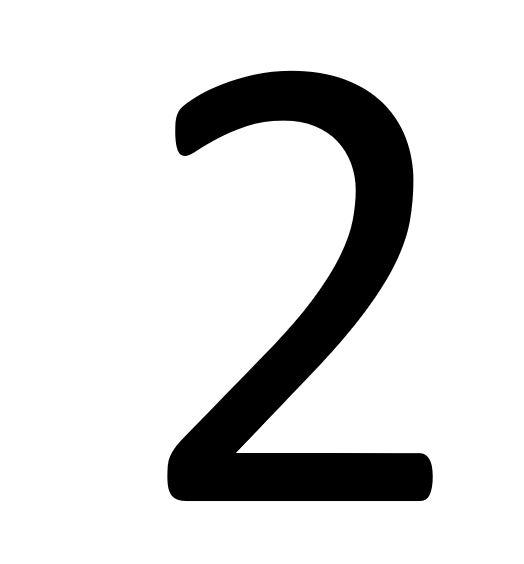

This is number :: 2
Processing Image :: text3.JPG


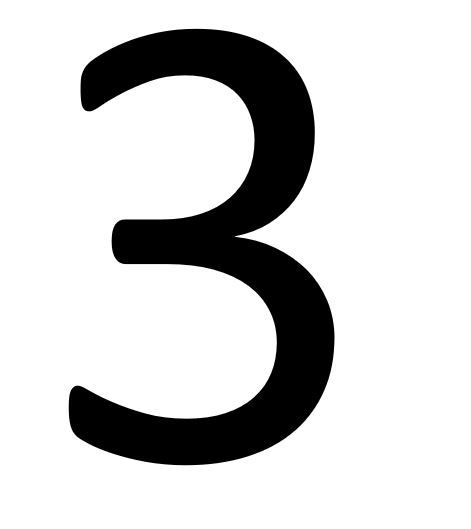

This is number :: 3
Processing Image :: text4-off-ct.JPG


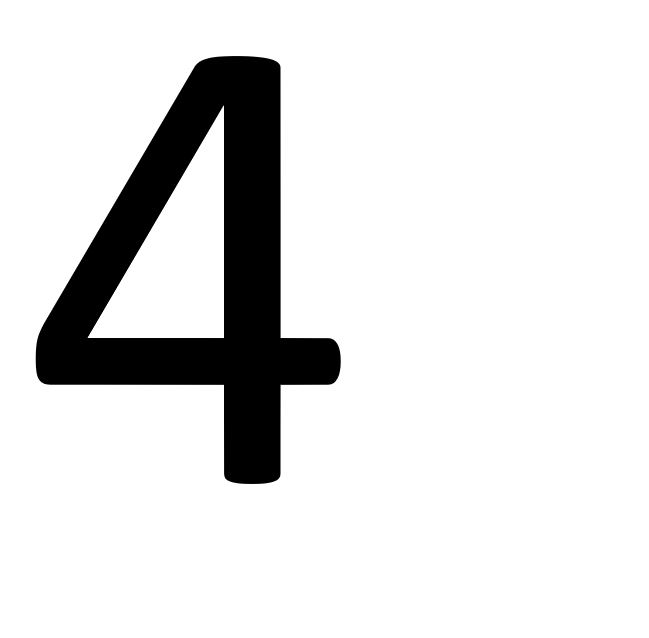

This is number :: 4
Processing Image :: text4.JPG


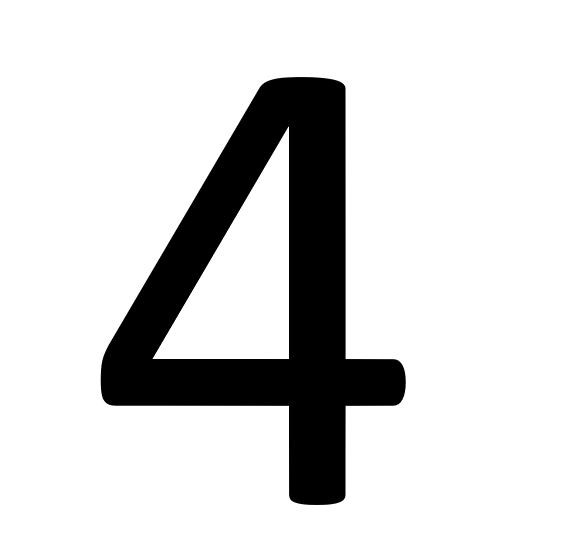

This is number :: 4
Processing Image :: text5.JPG


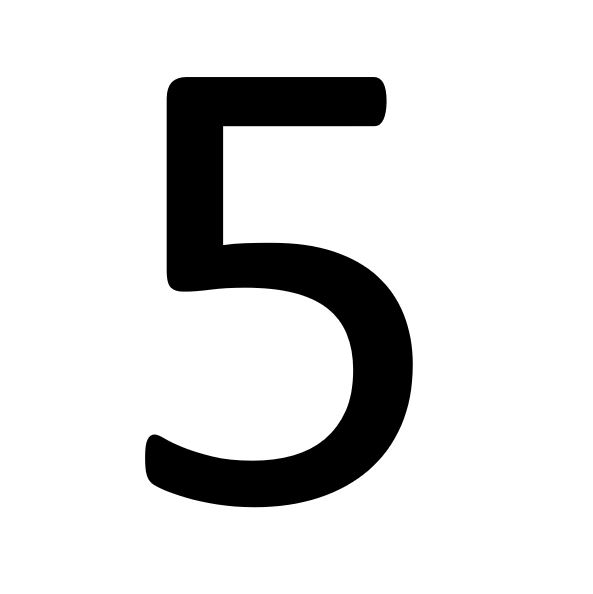

This is number :: 5
Processing Image :: text6-off-ct.JPG


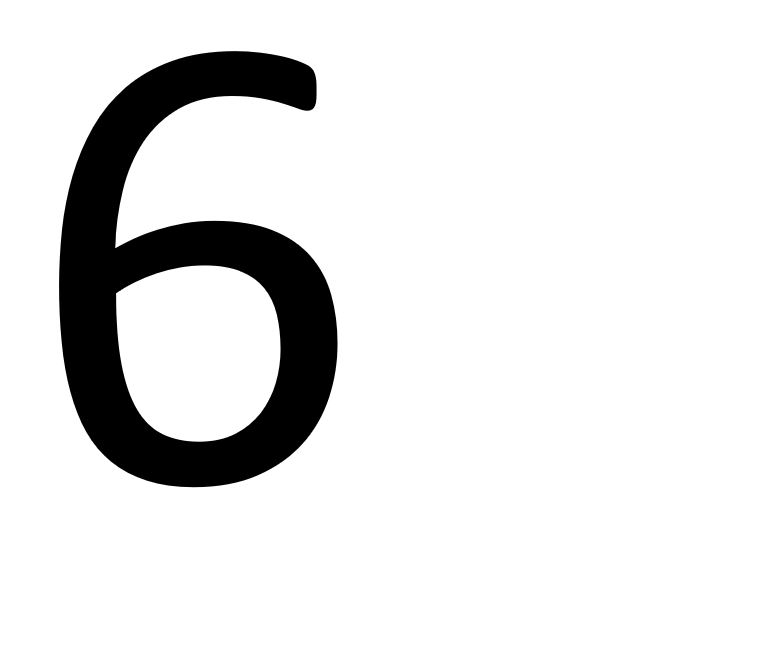

This is number :: 9
Processing Image :: text6.JPG


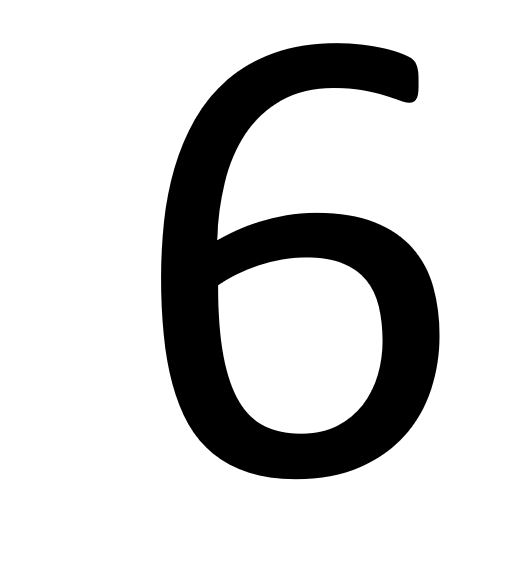

This is number :: 6
Processing Image :: text7.JPG


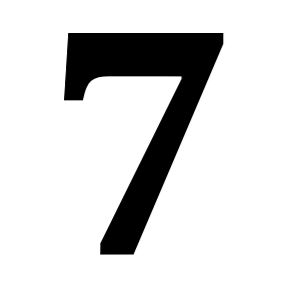

This is number :: 7
Processing Image :: text8-off-ct.JPG


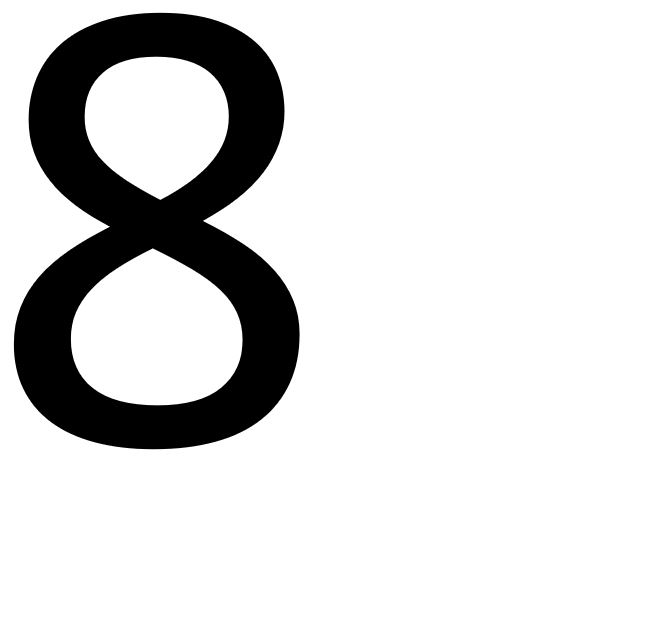

This is number :: 9
Processing Image :: text8.JPG


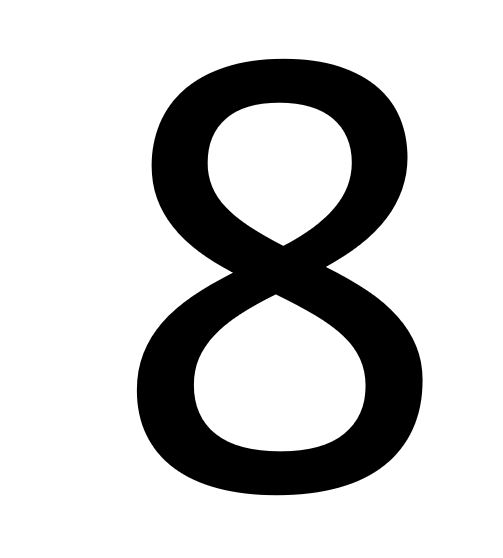

This is number :: 8
Processing Image :: text9-belly-rounded-slanted-leg-thicker.JPG


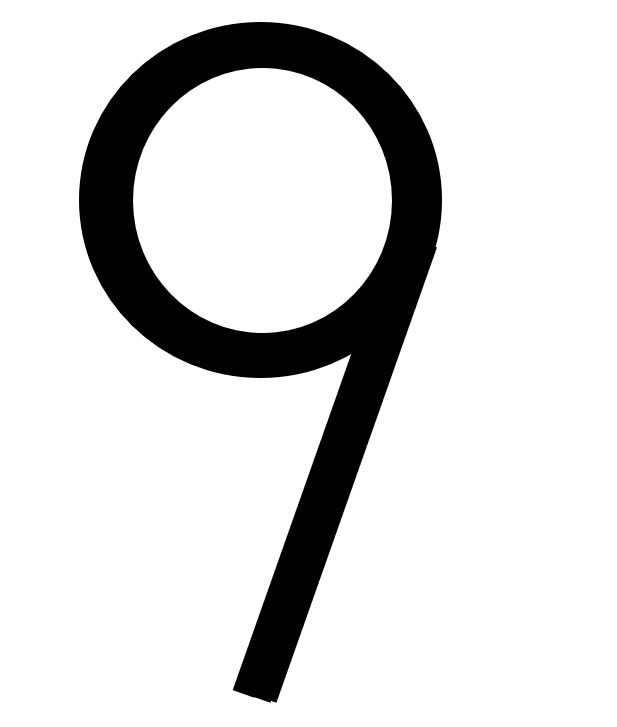

This is number :: 9
Processing Image :: text9-belly-rounded-slanted-leg.JPG


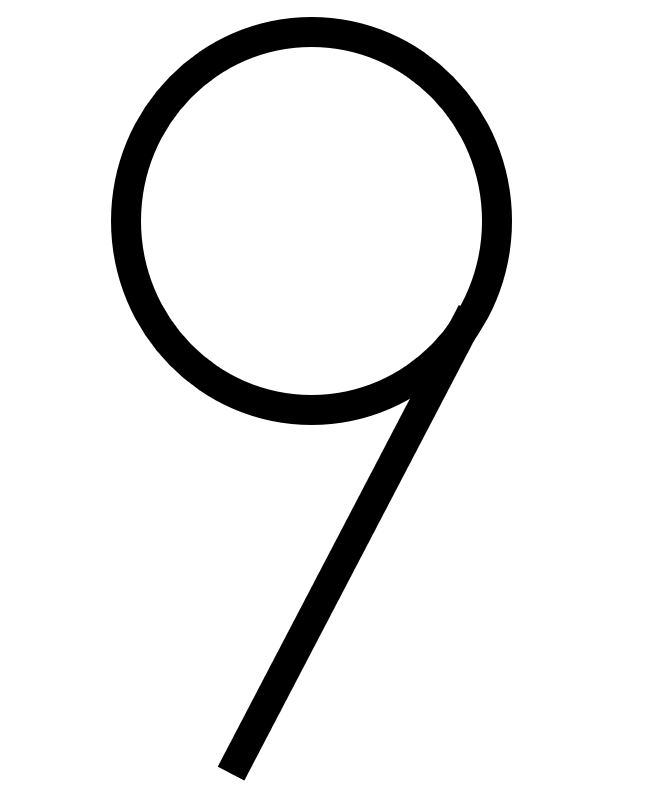

This is number :: 9
Processing Image :: text9-belly-rounded-very-slanted-leg-off-ct.JPG


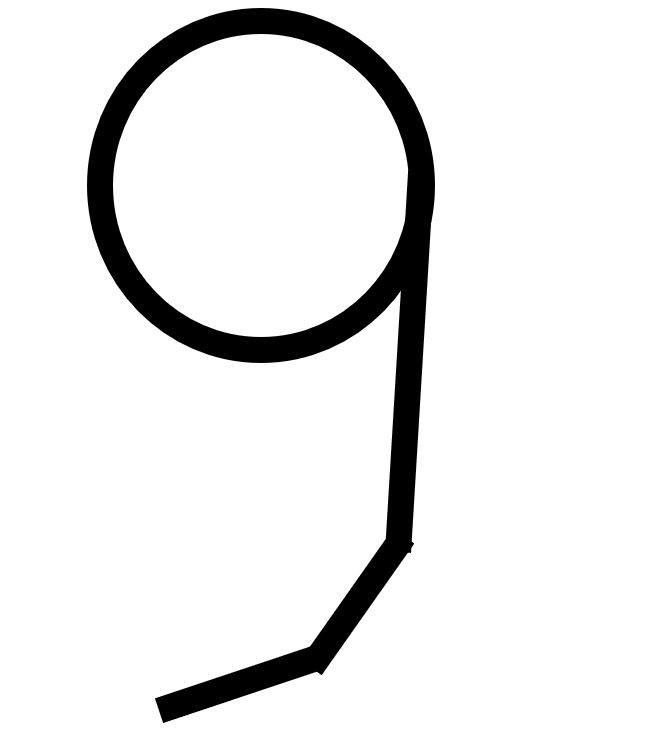

This is number :: 9
Processing Image :: text9.JPG


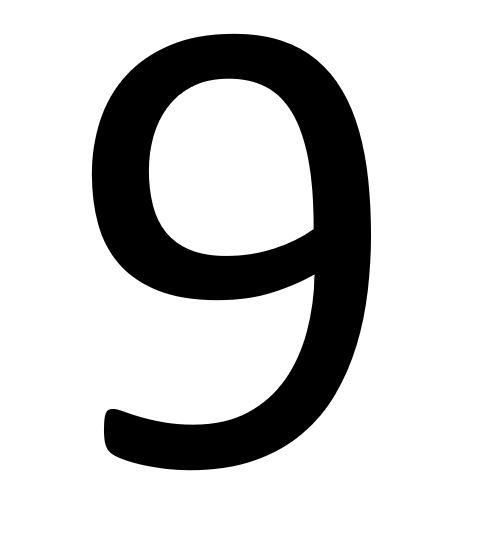

This is number :: 9
Total Prediction Run Time :: 2.292 seconds || 62 images


In [20]:
# create a list of all picture path inside test image folder
base_path = "./images/test-img/"
img_list = [base_path + img for img in listdir(base_path) if isfile(join(base_path, img))]

# looping thru each img and make prediction
st_time = time()
for ea_iter in tf.range(len(img_list)):
    ea_iter = tf.cast(ea_iter, tf.int64)
    img_predict(img_list[ea_iter])
total_time = time() - st_time 
print (f'Total Prediction Run Time :: {round(total_time, 3)} seconds || {len(img_list)} images')

Processing Image :: 7-golden-off-ct.JPG


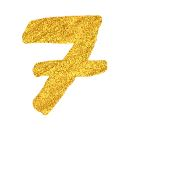

This is number :: 1
Processing Image :: 7-nebula-ct.JPG


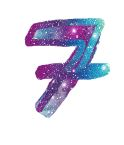

This is number :: 7
Processing Image :: 7-nebula-off-ct-with-artifact.JPG


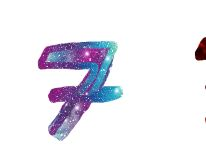

This is number :: 7
Processing Image :: 7-nebula-off-ct.JPG


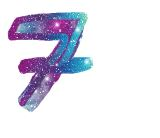

This is number :: 7
Processing Image :: 7-off-ct.JPG


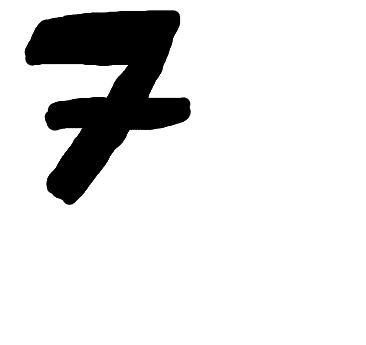

This is number :: 7
Processing Image :: 7-rainbow-ct.JPG


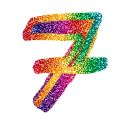

This is number :: 3
Processing Image :: 7-rainbow-off-ct.JPG


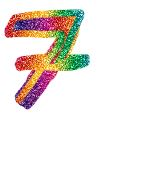

This is number :: 7
Processing Image :: 7-red-marble-off-ct.JPG


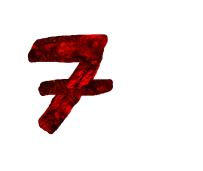

This is number :: 7
Processing Image :: 7-rose-gold-off-ct.JPG


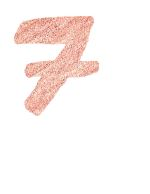

This is number :: 1
Processing Image :: 7-sandstone-ct.JPG


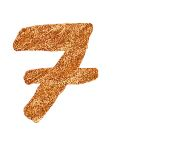

This is number :: 7
Processing Image :: 7-silverstone-ct.JPG


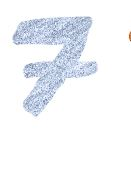

This is number :: 1
Processing Image :: 7.JPG


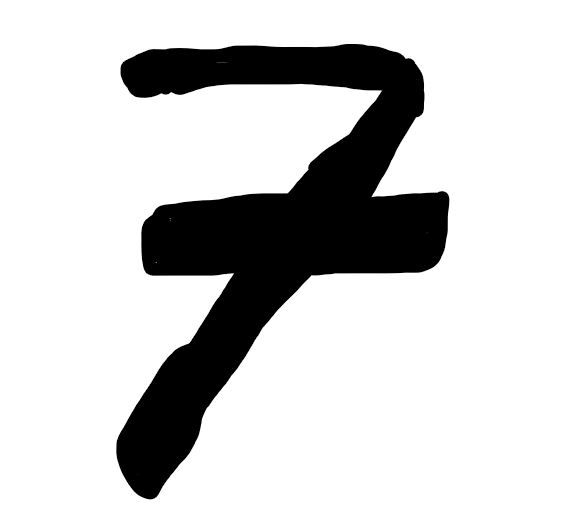

This is number :: 7
Processing Image :: 7way-off-ct.JPG


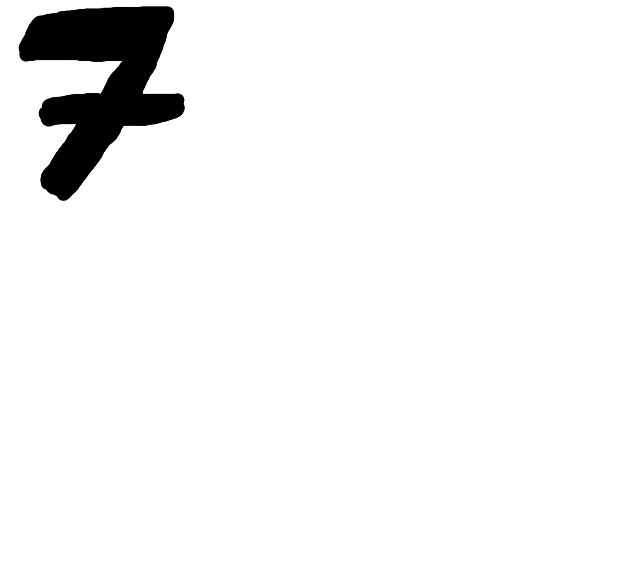

This is number :: 1
Processing Image :: hand7-.JPG


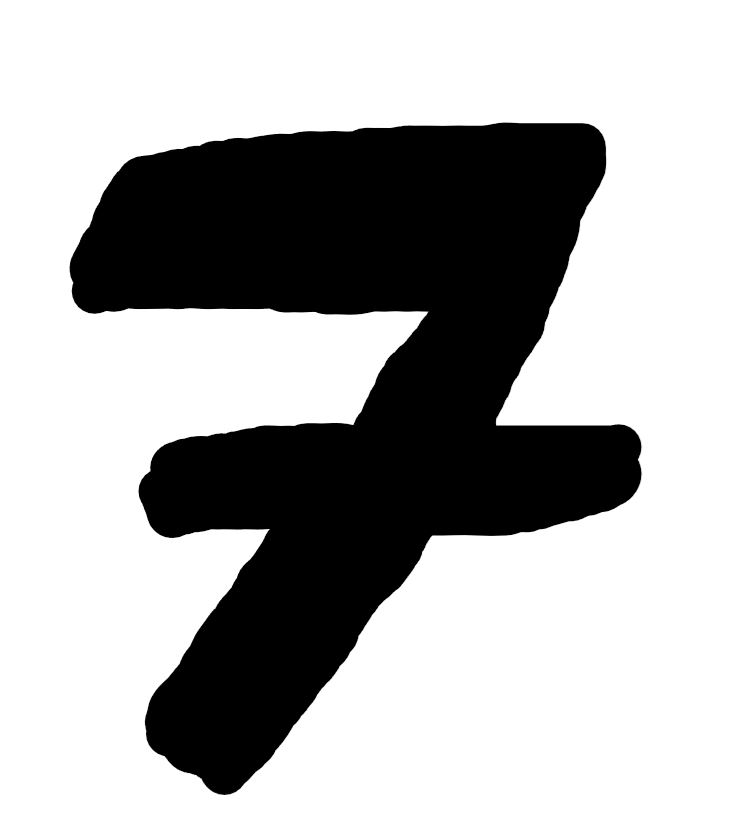

This is number :: 7
Processing Image :: hand7.JPG


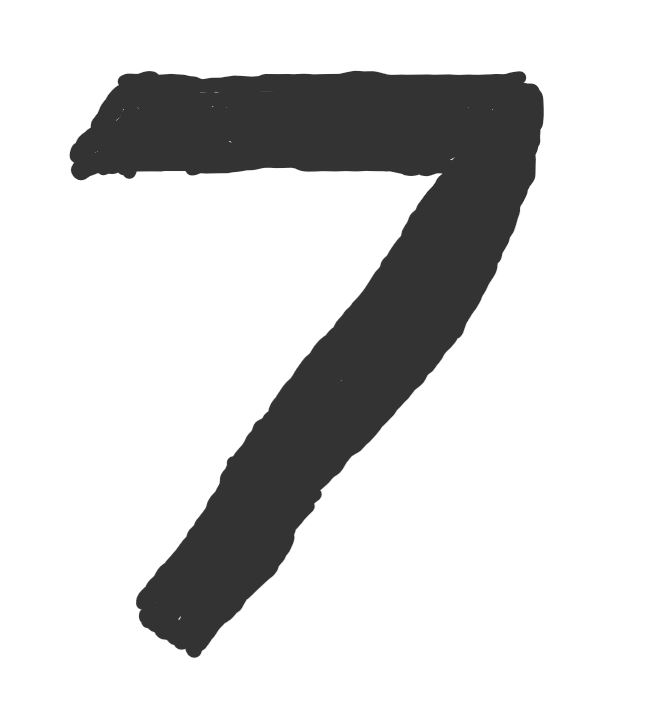

This is number :: 7
Processing Image :: text7.JPG


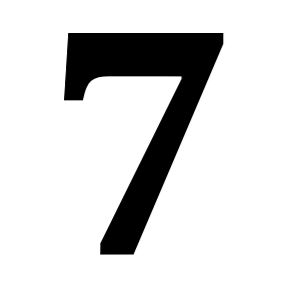

This is number :: 7


In [21]:
# create a list of all picture path inside test image folder
base_path = "./images/test-img/num7-variant/"
img_list = [base_path + img for img in listdir(base_path) if isfile(join(base_path, img))]

# looping thru each img and make prediction
for ea_iter in tf.range(len(img_list)):
    ea_iter = tf.cast(ea_iter, tf.int64)
    img_predict(img_list[ea_iter])